# **Customer Churn Prediction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import math
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Code Basics Deep Learning/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

# ***Data Preprocessing:***

In [ ]:
# CustomerID is useless:
data.drop('customerID', axis = 'columns', inplace = True)

In [ ]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
data.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [ ]:
data.TotalCharges.values
# convert from object to integer:

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
# some TotalCharges values have spaces between them so we ignore those datasets:
pd.to_numeric(data.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
# printing those TotalCharges values which had spaces betweem them: 
data[pd.to_numeric(data.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
# df.iloc[488]

In [ ]:
data[pd.to_numeric(data.TotalCharges, errors='coerce').isnull()].shape
# we can delete 11 datasets out of 7043 datasets

(11, 20)

In [ ]:
df = data[data.TotalCharges!=' ']
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# convert from object to integer:
df.TotalCharges = pd.to_numeric(df.TotalCharges)
df.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df.shape

(7032, 20)

In [ ]:
df[df.Churn == 'No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


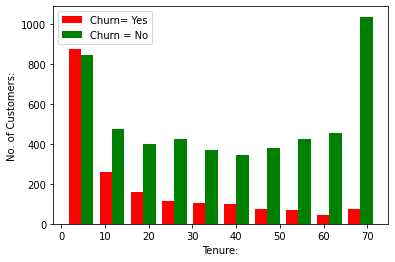

In [ ]:
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

plt.xlabel('Tenure:')
plt.ylabel('No. of Customers:')
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['red', 'green'], label = ['Churn= Yes', 'Churn = No'])
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


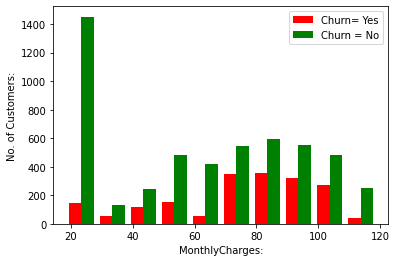

In [ ]:
MonthlyCharges_churn_no = df[df.Churn == 'No'].MonthlyCharges
MonthlyCharges_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges

plt.xlabel('MonthlyCharges:')
plt.ylabel('No. of Customers:')
plt.hist([MonthlyCharges_churn_yes, MonthlyCharges_churn_no], color = ['red', 'green'], label = ['Churn= Yes', 'Churn = No'])
plt.legend()
plt.show()

In [ ]:
# Printing unique values of each column:
for column in df:
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [ ]:
for column in df:
    if df[column].dtypes == 'object':
        print(f'{column} : {df[column].unique()}')

# Replace 'No phone service' and 'No internet service' with 'No' only.

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
df.replace('No phone service', 'No', inplace = True)
df.replace('No internet service', 'No', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
for column in df:
    if df[column].dtypes == 'object':
        print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                  'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for column in yes_no_columns:
    df[column].replace({'Yes': 1, 'No': 0}, inplace = True)                   

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
for column in df:
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
df['gender'].replace({'Female': 1, 'Male': 0}, inplace = True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# Hot encoding:
df1 = pd.get_dummies(data = df, columns = ['InternetService', 'Contract', 'PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
print(df1.shape)
print(df.shape)

(7032, 27)
(7032, 20)


In [ ]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
# Scaling of data:
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])

In [ ]:
df1.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2939,0,1,0,0,0.154930,1,0,0,1,1,1,0,0,1,0.652239,0.116657,1,0,1,0,1,0,0,0,0,0,1
519,0,0,0,0,0.154930,1,0,0,0,0,0,0,0,0,0.017910,0.028462,0,0,0,1,1,0,0,0,1,0,0
1149,0,0,1,1,0.169014,1,0,0,0,1,0,1,1,1,0.780100,0.132016,1,0,1,0,1,0,0,0,0,0,1


# ***Applying ANN:***

In [ ]:
X = df1.drop('Churn', axis = 'columns')
y = df1['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5625, 26)
(1407, 26)


In [ ]:
model = keras.Sequential([
        keras.layers.Dense(20 , input_shape = (26,), activation = 'relu'), # input layer, hidden layer = 20
        # keras.layers.Dense(15, activation = 'relu'), # hidden layer = 15 
        keras.layers.Dense(1, activation = 'sigmoid'), # output layer                  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 15)

Epoch 1/15
176/176 [==============================] - 1s 2ms/step - loss: 0.5060 - accuracy: 0.7500
Epoch 2/15
176/176 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.7938
Epoch 3/15
176/176 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.8009
Epoch 4/15
176/176 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8020
Epoch 5/15
176/176 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8046
Epoch 6/15
176/176 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8052
Epoch 7/15
176/176 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8085
Epoch 8/15
176/176 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8078
Epoch 9/15
176/176 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8075
Epoch 10/15
176/176 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8098

In [ ]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.7868


[0.440022736787796, 0.7867803573608398]

In [ ]:
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred[:5]        

[0, 0, 0, 1, 0]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.72      0.74      1407



Text(134.8800000000001, 0.5, 'Truth')

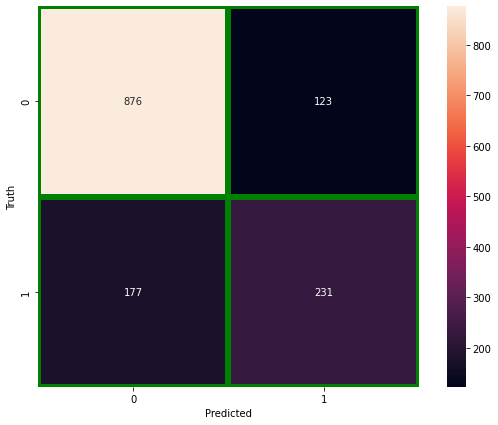

In [ ]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd', linewidths= 5, linecolor= 'green', square=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Data Imbalace:**

In [ ]:
# Class Count:
count_class_0, count_class_1 = df1.Churn.value_counts()
print(count_class_0)
print(count_class_1)

# Divide data by class:
df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]

5163
1869


In [ ]:
print(df_class_0.shape)
print(df_class_1.shape)

(5163, 27)
(1869, 27)


# **1. Under Sampling of Majority data:**

In [ ]:
# We need to Under sample the class 0: i.e. Datapoints in class 0 = Datapoints in class 1
df_class_under = df_class_0.sample(count_class_1)
# New dataset with equal classes:
df_test_under = pd.concat([df_class_under, df_class_1], axis = 0)

print('Random under Sampling:')
print(df_test_under.Churn.value_counts())
print(df_test_under.shape)

Random under Sampling:
0    1869
1    1869
Name: Churn, dtype: int64
(3738, 27)


In [ ]:
X = df_test_under.drop("Churn", axis = 'columns')
y = df_test_under['Churn']

X_train_UnderSample, X_test_UnderSample, y_train_UnderSample, y_test_UnderSample = train_test_split(
                                                         X, y, test_size = 0.2, 
                                                         random_state = 15, stratify = y)
# stratify makes sure that y has equal no. of datasets of each class.

print(y_train_UnderSample.value_counts())

0    1495
1    1495
Name: Churn, dtype: int64


In [ ]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model2 = keras.Sequential([
        keras.layers.Dense(20 , input_shape = (26,), activation = 'relu'), # input layer, hidden layer = 20
        keras.layers.Dense(15, activation = 'relu'), # hidden layer = 15 
        keras.layers.Dense(1, activation = 'sigmoid'), # output layer                  
    ])

    model2.compile(optimizer='adam', loss= loss, metrics=['accuracy'])

    if weights == -1:
        model2.fit(X_train, y_train, epochs = 15)
    else:
        model2.fit(X_train, y_train, epochs = 15, class_weight = weights) 

    print(model2.evaluate(X_test, y_test)) 
    y_predicted = model2.predict(X_test)
    y_predicted = np.round(y_predicted)   

    print(' Classification report:\n', classification_report(y_test, y_predicted))

    return y_predicted   

In [ ]:
y_pred = ANN(X_train_UnderSample, y_train_UnderSample, X_test_UnderSample, y_test_UnderSample, 'binary_crossentropy', -1)

Epoch 1/15
94/94 [==============================] - 1s 3ms/step - loss: 0.6253 - accuracy: 0.6726
Epoch 2/15
94/94 [==============================] - 0s 3ms/step - loss: 0.5295 - accuracy: 0.7455
Epoch 3/15
94/94 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7505
Epoch 4/15
94/94 [==============================] - 0s 3ms/step - loss: 0.4934 - accuracy: 0.7565
Epoch 5/15
94/94 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7669
Epoch 6/15
94/94 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7645
Epoch 7/15
94/94 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7652
Epoch 8/15
94/94 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7692
Epoch 9/15
94/94 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7729
Epoch 10/15
94/94 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.7709
Epoch 11/15
94/94 [

# **2. Over Sampling of Minority Data:**

In [ ]:
print(count_class_0)
print(count_class_1)


# # Divide data by class:
# df_class_0 = df1[df1['Churn'] == 0]
# df_class_1 = df1[df1['Churn'] == 1]

5163
1869


In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace= True)
print(df_class_1_over.shape)
print(df_class_0.shape)

(5163, 27)
(5163, 27)


In [ ]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)
df_test_over.shape

(10326, 27)

In [ ]:
X = df_test_over.drop('Churn', axis = 'columns')
y = df_test_over['Churn']
X_train, X_test,  y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state= 15, stratify = y)

In [ ]:
print(y_train.value_counts())

1    4130
0    4130
Name: Churn, dtype: int64


In [ ]:
y_pred = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/15
259/259 [==============================] - 2s 3ms/step - loss: 0.5642 - accuracy: 0.7108
Epoch 2/15
259/259 [==============================] - 1s 3ms/step - loss: 0.4993 - accuracy: 0.7573
Epoch 3/15
259/259 [==============================] - 1s 3ms/step - loss: 0.4907 - accuracy: 0.7621
Epoch 4/15
259/259 [==============================] - 1s 3ms/step - loss: 0.4856 - accuracy: 0.7651
Epoch 5/15
259/259 [==============================] - 1s 3ms/step - loss: 0.4815 - accuracy: 0.7690
Epoch 6/15
259/259 [==============================] - 1s 3ms/step - loss: 0.4781 - accuracy: 0.7717
Epoch 7/15
259/259 [==============================] - 1s 3ms/step - loss: 0.4744 - accuracy: 0.7723
Epoch 8/15
259/259 [==============================] - 1s 3ms/step - loss: 0.4725 - accuracy: 0.7732
Epoch 9/15
259/259 [==============================] - 1s 2ms/step - loss: 0.4696 - accuracy: 0.7766
Epoch 10/15
259/259 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7778

# **3. Over Sampling Minority data using SMOTE(Synthetic Minority Over Sampling Technique):**
# **Using kNN method**

In [ ]:
X = df1.drop('Churn', axis = 'columns')
y = df1['Churn']
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 15, stratify = y_sm)
print(y_train_sm.value_counts())
print(y_test_sm.value_counts())

1    4130
0    4130
Name: Churn, dtype: int64
1    1033
0    1033
Name: Churn, dtype: int64


In [ ]:
y_pred = ANN(X_train_sm, y_train_sm, X_test_sm, y_test_sm, 'binary_crossentropy', -1)

Epoch 1/15
259/259 [==============================] - 2s 3ms/step - loss: 0.5433 - accuracy: 0.7346
Epoch 2/15
259/259 [==============================] - 1s 3ms/step - loss: 0.4773 - accuracy: 0.7748
Epoch 3/15
259/259 [==============================] - 1s 3ms/step - loss: 0.4703 - accuracy: 0.7758
Epoch 4/15
259/259 [==============================] - 1s 3ms/step - loss: 0.4647 - accuracy: 0.7811
Epoch 5/15
259/259 [==============================] - 1s 3ms/step - loss: 0.4609 - accuracy: 0.7840
Epoch 6/15
259/259 [==============================] - 1s 3ms/step - loss: 0.4569 - accuracy: 0.7890
Epoch 7/15
259/259 [==============================] - 1s 3ms/step - loss: 0.4547 - accuracy: 0.7837
Epoch 8/15
259/259 [==============================] - 1s 3ms/step - loss: 0.4507 - accuracy: 0.7900
Epoch 9/15
259/259 [==============================] - 1s 3ms/step - loss: 0.4462 - accuracy: 0.7962
Epoch 10/15
259/259 [==============================] - 1s 3ms/step - loss: 0.4423 - accuracy: 0.7923

# **4. Ensemble Method with Under sampling: (Take multiple set of training data)**

In [ ]:
X = df1.drop('Churn', axis = 'columns')
y = df1['Churn']
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print(y_train.value_counts())
print(y_test.value_counts())

0    4130
1    1495
Name: Churn, dtype: int64
0    1033
1     374
Name: Churn, dtype: int64


In [ ]:
print(4130/1495)
print(4130/3) # about 3 datasets we need to create

2.762541806020067
1376.6666666666667


In [ ]:
df2 = X_train.copy()
df2['Churn'] = y_train

In [ ]:
df2_class_0 = df2[df2.Churn == 0]
df2_class_1 = df2[df2.Churn == 1]
df2_class_0.shape, df2_class_1.shape

((4130, 27), (1495, 27))

In [ ]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis = 0)

    X_train = df_train.drop('Churn', axis = 'columns')
    y_train = df_train.Churn

    return X_train, y_train

# **Model 1:**

In [ ]:
X_train, y_train = get_train_batch(df2_class_0, df2_class_1, 0, 1495)
print(X_train.shape)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

(2990, 26)
Epoch 1/15
94/94 [==============================] - 1s 4ms/step - loss: 0.6036 - accuracy: 0.7281
Epoch 2/15
94/94 [==============================] - 0s 3ms/step - loss: 0.5126 - accuracy: 0.7585
Epoch 3/15
94/94 [==============================] - 0s 3ms/step - loss: 0.4944 - accuracy: 0.7609
Epoch 4/15
94/94 [==============================] - 0s 3ms/step - loss: 0.4875 - accuracy: 0.7649
Epoch 5/15
94/94 [==============================] - 0s 4ms/step - loss: 0.4827 - accuracy: 0.7679
Epoch 6/15
94/94 [==============================] - 0s 4ms/step - loss: 0.4800 - accuracy: 0.7676
Epoch 7/15
94/94 [==============================] - 0s 4ms/step - loss: 0.4783 - accuracy: 0.7679
Epoch 8/15
94/94 [==============================] - 0s 4ms/step - loss: 0.4745 - accuracy: 0.7732
Epoch 9/15
94/94 [==============================] - 0s 4ms/step - loss: 0.4728 - accuracy: 0.7696
Epoch 10/15
94/94 [==============================] - 0s 4ms/step - loss: 0.4719 - accuracy: 0.7739
Epoch 11

# **Model 2:**

In [ ]:
X_train, y_train = get_train_batch(df2_class_0, df2_class_1, 1495, 2990)
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/15
94/94 [==============================] - 2s 3ms/step - loss: 0.5914 - accuracy: 0.7100
Epoch 2/15
94/94 [==============================] - 0s 4ms/step - loss: 0.5126 - accuracy: 0.7502
Epoch 3/15
94/94 [==============================] - 1s 8ms/step - loss: 0.4975 - accuracy: 0.7579
Epoch 4/15
94/94 [==============================] - 0s 4ms/step - loss: 0.4915 - accuracy: 0.7565
Epoch 5/15
94/94 [==============================] - 0s 3ms/step - loss: 0.4856 - accuracy: 0.7632
Epoch 6/15
94/94 [==============================] - 0s 3ms/step - loss: 0.4818 - accuracy: 0.7639
Epoch 7/15
94/94 [==============================] - 0s 3ms/step - loss: 0.4785 - accuracy: 0.7682
Epoch 8/15
94/94 [==============================] - 0s 4ms/step - loss: 0.4757 - accuracy: 0.7696
Epoch 9/15
94/94 [==============================] - 0s 3ms/step - loss: 0.4746 - accuracy: 0.7686
Epoch 10/15
94/94 [==============================] - 0s 4ms/step - loss: 0.4714 - accuracy: 0.7716
Epoch 11/15
94/94 [

# **Model 3:**

In [ ]:
X_train, y_train = get_train_batch(df2_class_0, df2_class_1, 2990, 4130)
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

NameError: ignored

# **Voting:**

In [ ]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0
    

In [ ]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.77      0.60       374

    accuracy                           0.73      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.79      0.73      0.75      1407

